## Stock Market Real-Time Data Analysis

In [ ]:
# kiến thức cần thiết:
# - cách sử dụng thư viện requests để gửi request lên server
# - cách sử dụng thư viện BeautifulSoup để parse html
# - cách sử dụng thư viện re để thao tác với regular expression
# - cách sử dụng thư viện json để parse json
# - cách sử dụng thư viện csv để ghi file csv
# - cách sử dụng thư viện os để thao tác với file
# - cách sử dụng thư viện sys để thao tác với hệ thống
# - cách sử dụng thư viện time để thao tác với thời gian
# - cách sử dụng thư viện random để tạo số ngẫu nhiên
# - cách sử dụng thư viện argparse để parse argument
# - cách sử dụng thư viện logging để log
# - cách sử dụng thư viện threading để tạo thread
# - cách sử dụng thư viện concurrent.futures để tạo thread
# - cách sử dụng thư viện asyncio để tạo async function
# - cách sử dụng thư viện aiohttp để gửi request async
# - cách sử dụng thư viện aiofiles để ghi file async
# - cách sử dụng thư viện aiohttp.ClientSession để gửi request async
# kiến thức cần thiết để phân tích dữ liệu:
# - cách phân tích dữ liệu từ html
# - cách phân tích dữ liệu từ json
# - cách phân tích dữ liệu từ xml
# - cách phân tích dữ liệu từ csv
# - cách phân tích dữ liệu từ text
# - cách phân tích dữ liệu từ binary
# - cách phân tích dữ liệu từ database
# - cách phân tích dữ liệu từ log
# cách dùng spark để phân tích dữ liệu:
# - cách tạo spark session
# - cách tạo dataframe
# - cách tạo rdd
# - cách thao tác với dataframe
# - cách thao tác với rdd
# - cách thao tác với column
# - cách thao tác với row
# - cách thao tác với sql
# - cách thao tác với udf
# - cách thao tác với window function

In [2]:
import numpy as np
from selenium import webdriver
from time import sleep
import random
from selenium.common.exceptions import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
import pandas as pd

In [3]:
driver = webdriver.Chrome()

In [22]:
title = []
links = []
price = []
discount_all = []
discountPrecent = []

In [24]:
for i in range(1):
    driver.get(f'https://www.lazada.vn/dien-thoai-di-dong/?page={i+1}&spm=a2o4n.searchlist.cate_1.1.6a725443R7ay2g')
    sleep(random.randint(5, 10))
    elems = driver.find_elements(By.CSS_SELECTOR, '.RfADt [href]')
    title += [elem.text for elem in elems]
    links += [elem.get_attribute('href') for elem in elems]
    elems_price = driver.find_elements(By.CSS_SELECTOR, '.aBrP0')
    price += [elem.text for elem in elems_price]
    elems_discount = driver.find_elements(By.CSS_SELECTOR, '.WNoq3')
    discount_all += [elem.text for elem in elems_discount]
    elems_discountPrecent = driver.find_elements(By.CSS_SELECTOR, '.WNoq3 .IcOsH')
    for elem in elems_discountPrecent:
        try:
            discountPrecent.append(elem.text)
        except NoSuchElementException:
            discountPrecent.append('0%')
            print(i)
    print(f'Page {i+1} done')

Page 1 done


In [25]:
len(title), len(links), len(price), len(discount_all), len(discountPrecent)

(40, 40, 40, 40, 25)

In [19]:
discountPrecent

['42% Off',
 '27% Off',
 '44% Off',
 '17% Off',
 '42% Off',
 '13% Off',
 '12% Off',
 '40% Off',
 '30% Off',
 '9% Off',
 '35% Off',
 '42% Off',
 '12% Off',
 '42% Off',
 '22% Off',
 '13% Off',
 '4% Off',
 '26% Off',
 '14% Off',
 '31% Off',
 '50% Off',
 '16% Off',
 '16% Off',
 '41% Off',
 '11% Off',
 '19% Off',
 '38% Off',
 '49% Off',
 '21% Off',
 '33% Off',
 '17% Off',
 '39% Off',
 '34% Off',
 '10% Off',
 '9% Off',
 '42% Off',
 '42% Off',
 '40% Off',
 '36% Off',
 '31% Off',
 '42% Off',
 '40% Off',
 '20% Off',
 '48% Off',
 '9% Off',
 '13% Off',
 '14% Off',
 '21% Off',
 '50% Off',
 '11% Off',
 '12% Off',
 '42% Off',
 '40% Off',
 '37% Off',
 '40% Off',
 '17% Off',
 '39% Off',
 '35% Off',
 '11% Off',
 '19% Off',
 '40% Off',
 '27% Off',
 '42% Off',
 '44% Off',
 '26% Off',
 '49% Off',
 '12% Off',
 '44% Off',
 '32% Off',
 '25% Off',
 '41% Off',
 '44% Off',
 '9% Off',
 '39% Off',
 '40% Off',
 '43% Off',
 '35% Off',
 '17% Off',
 '42% Off',
 '39% Off',
 '41% Off',
 '50% Off',
 '46% Off',
 '40% Off

In [57]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Đặt API key của bạn
api_key = 'XtLQfVAqvjwxOb_pNe3w8pp5JFFLYvIU'

# Khởi tạo TimeSeries để lấy dữ liệu theo thời gian thực
ts = TimeSeries(key=api_key, output_format='pandas')

# Lấy dữ liệu giá cổ phiếu theo thời gian thực, ví dụ: 'MSFT' cho Microsoft
data, meta_data = ts.get_intraday(symbol='MSFT', interval='1min', outputsize='full')

# Hiển thị dữ liệu
print(data)

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2024-07-03 16:59:00   460.06  460.075  459.810   459.920       12.0
2024-07-03 16:58:00   460.34  460.340  459.810   460.075       12.0
2024-07-03 16:57:00   460.34  460.340  460.000   460.075       28.0
2024-07-03 16:56:00   459.81  460.340  459.810   460.340       87.0
2024-07-03 16:55:00   460.08  460.327  459.823   460.030       96.0
...                      ...      ...      ...       ...        ...
2024-06-05 04:04:00   417.00  417.120  416.810   417.110      344.0
2024-06-05 04:03:00   416.84  417.180  416.840   417.000      135.0
2024-06-05 04:02:00   416.72  416.840  416.720   416.840       98.0
2024-06-05 04:01:00   416.83  416.830  416.820   416.830      184.0
2024-06-05 04:00:00   416.50  417.490  416.500   416.830      258.0

[18771 rows x 5 columns]


In [37]:
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-07-03 16:59:00,460.06,460.075,459.810,459.920,12.0
2024-07-03 16:58:00,460.34,460.340,459.810,460.075,12.0
2024-07-03 16:57:00,460.34,460.340,460.000,460.075,28.0
2024-07-03 16:56:00,459.81,460.340,459.810,460.340,87.0
2024-07-03 16:55:00,460.08,460.327,459.823,460.030,96.0
...,...,...,...,...,...
2024-06-05 04:04:00,417.00,417.120,416.810,417.110,344.0
2024-06-05 04:03:00,416.84,417.180,416.840,417.000,135.0
2024-06-05 04:02:00,416.72,416.840,416.720,416.840,98.0


In [31]:
# dùng apache spark để phân tích dữ liệu
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Khởi tạo spark session
spark = SparkSession.builder.appName('example').getOrCreate()

# Tạo dataframe từ dữ liệu
df = spark.createDataFrame(data.reset_index())

# Hiển thị schema của dataframe
df.printSchema()

# Hiển thị 5 dòng đầu của dataframe
df.limit(5)


root
 |-- date: timestamp (nullable = true)
 |-- 1. open: double (nullable = true)
 |-- 2. high: double (nullable = true)
 |-- 3. low: double (nullable = true)
 |-- 4. close: double (nullable = true)
 |-- 5. volume: double (nullable = true)



DataFrame[date: timestamp, 1. open: double, 2. high: double, 3. low: double, 4. close: double, 5. volume: double]

In [36]:
df

DataFrame[date: timestamp, 1. open: double, 2. high: double, 3. low: double, 4. close: double, 5. volume: double]

In [42]:
from kafka import KafkaProducer

# Khởi tạo Kafka producer
producer = KafkaProducer(bootstrap_servers='localhost:9092')


NoBrokersAvailable: NoBrokersAvailable

In [39]:
# Thống kê dữ liệu theo cột
df.groupBy('index').agg(F.mean('1. open'), F.mean('2. high')).show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `index` cannot be resolved. Did you mean one of the following? [`date`, `1. open`, `3. low`, `2. high`, `4. close`].;
'Aggregate ['index], ['index, avg('1. open) AS avg(1. open)#169, avg('2. high) AS avg(2. high)#170]
+- LogicalRDD [date#49, 1. open#50, 2. high#51, 3. low#52, 4. close#53, 5. volume#54], false


Mean Squared Error: 16.88701140223253


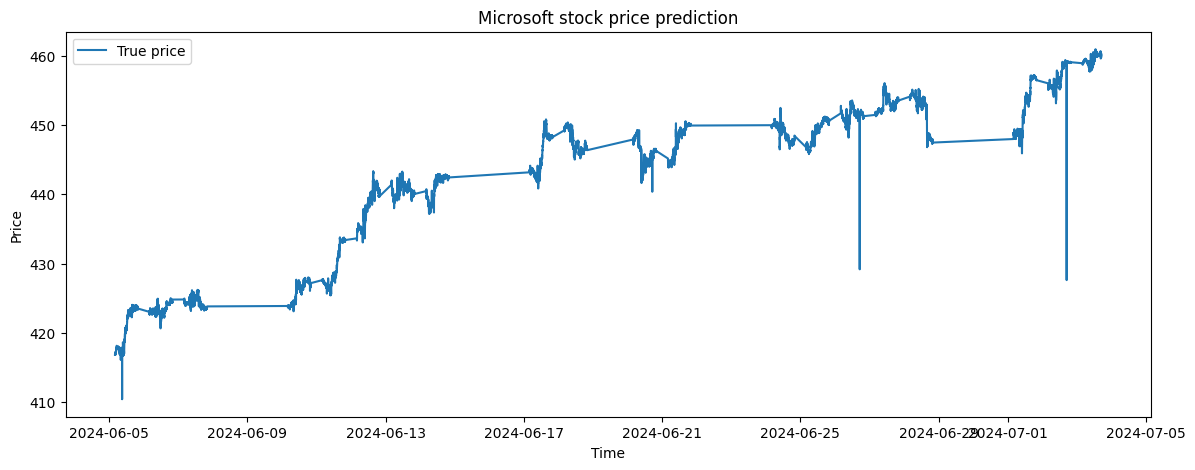

In [43]:
# xây dựng mô hình hồi quy tuyến tính
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Tạo X và y
X = data.index.values.astype(float).reshape(-1, 1)
y = data['4. close'].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá cổ phiếu
y_pred = model.predict(X_test)

# Đánh giá mô hình
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Hiển thị biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(data.index, data['4. close'], label='True price')
plt.title('Microsoft stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Mean Squared Error: 16.88701140223253


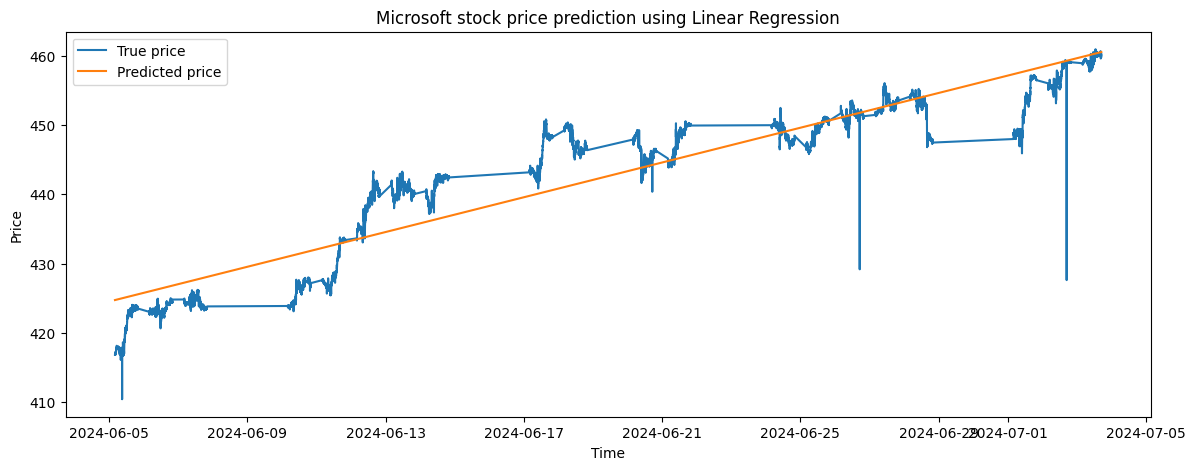

In [65]:
#làm cho mô hình dự đoán trên từng phút thay vì trên ngày rồi vẽ biểu đồ
# Tạo X và y
X = data.index.values.astype(float).reshape(-1, 1)
y = data['4. close'].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá cổ phiếu
y_pred = model.predict(X_test)

# Đánh giá mô hình
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Hiển thị biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['4. close'], label='True price')
plt.plot(data.index, model.predict(X), label='Predicted price')
plt.title('Microsoft stock price prediction using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Mean Squared Error: 0.43059286074004716


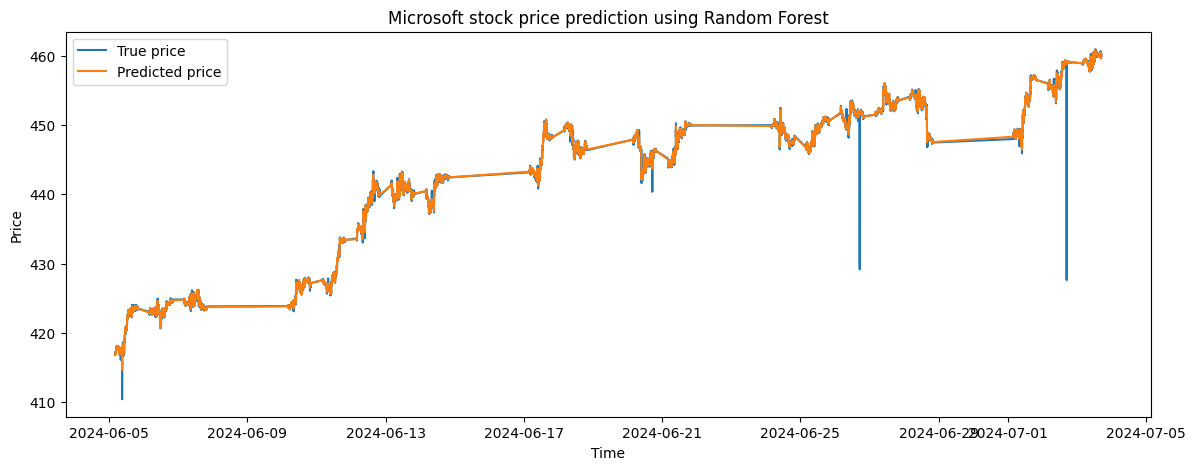

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Tạo mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Dự đoán giá cổ phiếu
y_pred = model.predict(X_test)

# Đánh giá mô hình
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Hiển thị biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['4. close'], label='True price')
plt.plot(data.index, model.predict(X), label='Predicted price')
plt.title('Microsoft stock price prediction using Random Forest')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Mean Squared Error: 137.01488282975987


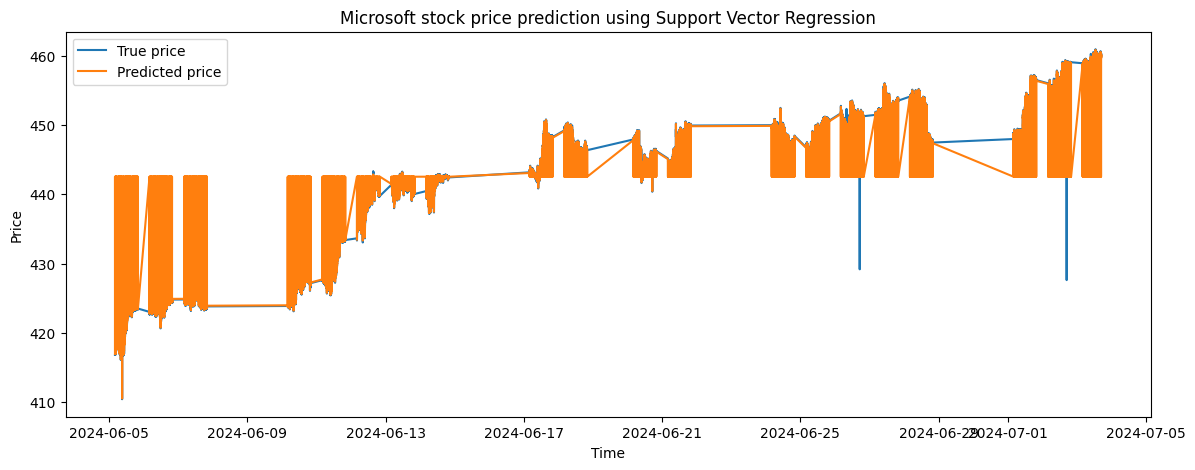

In [63]:
from sklearn.svm import SVR

# Tạo mô hình SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model.fit(X_train, y_train)

# Dự đoán giá cô phiếu
y_pred = model.predict(X_test)

# Đánh giá mô hình
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Hiển thị biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['4. close'], label='True price')
plt.plot(data.index, model.predict(X), label='Predicted price')
plt.title('Microsoft stock price prediction using Support Vector Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Mean Squared Error: 1.9108819919746625


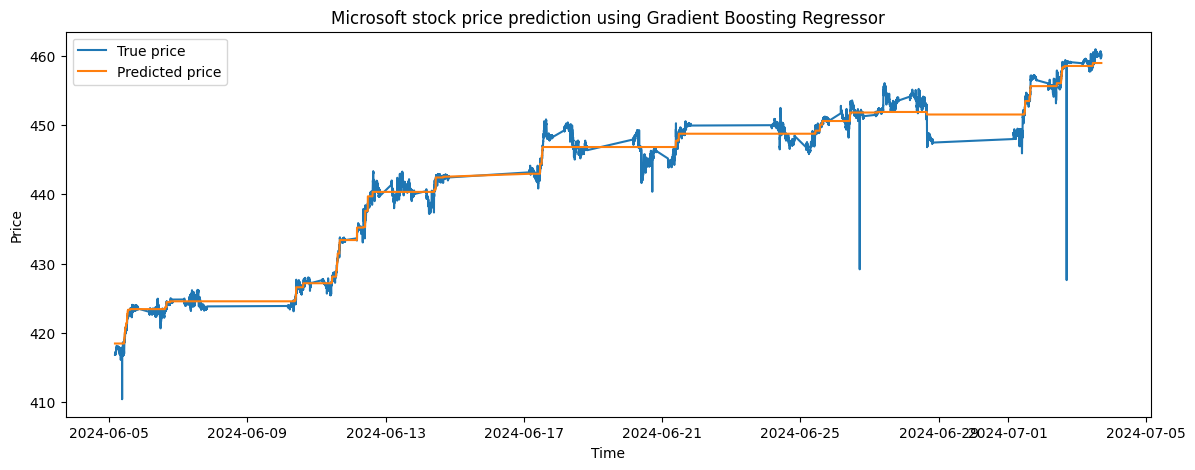

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

# Tạo mô hình Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')
model.fit(X_train, y_train)

# Dự giá cổ phiếu
y_pred = model.predict(X_test)

# Đánh giá mô hình
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Hiển thị biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['4. close'], label='True price')
plt.plot(data.index, model.predict(X), label='Predicted price')
plt.title('Microsoft stock price prediction using Gradient Boosting Regressor')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

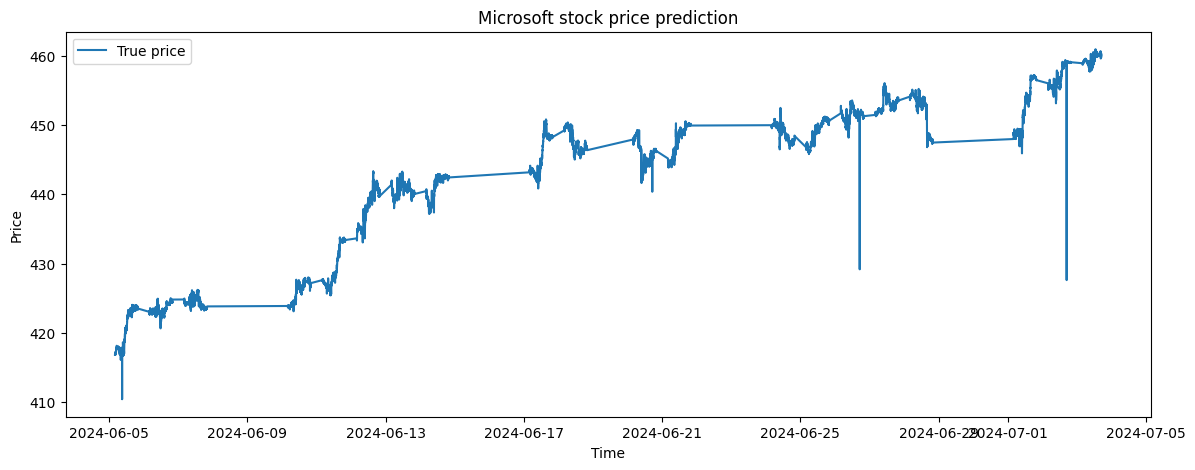

In [53]:
# Hiển thị biểu đồ theo giờ
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(data.index, data['4. close'], label='True price')
plt.title('Microsoft stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Model, MSE, Time
Linear Regression, 16.88701140223253, 0.2s
Random Forest, 0.43059286074004716, 2.4s
Support Vector Regression, 137.01488282975987, 1m 25.2s
Gradient Boosting Regressor, 1.9108819919746625, 0.3s

<Axes: xlabel='hour'>

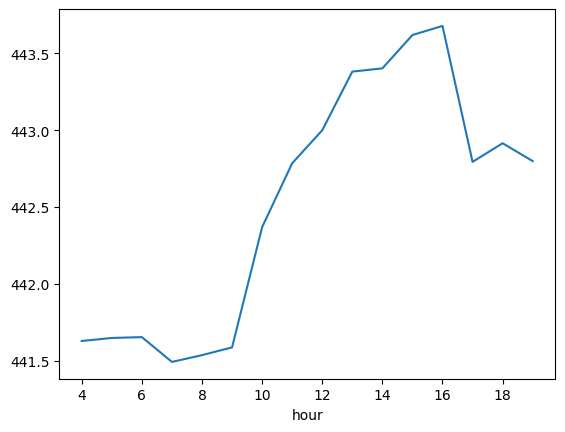

In [51]:
data['hour']
data.groupby('hour')['4. close'].mean().plot()

<Axes: xlabel='hour'>

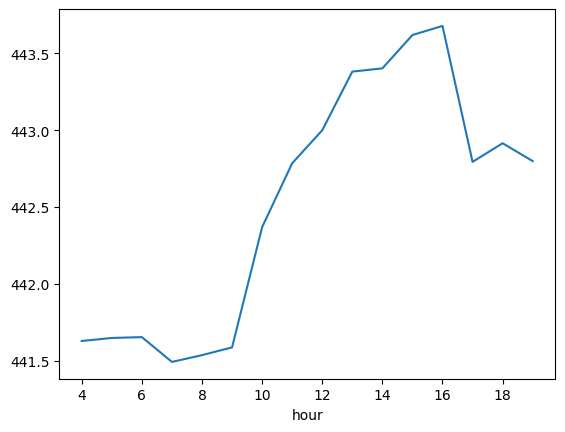

In [47]:
data['hour'] = data.index.hour
data.groupby('hour')['4. close'].mean().plot()

<Axes: xlabel='day'>

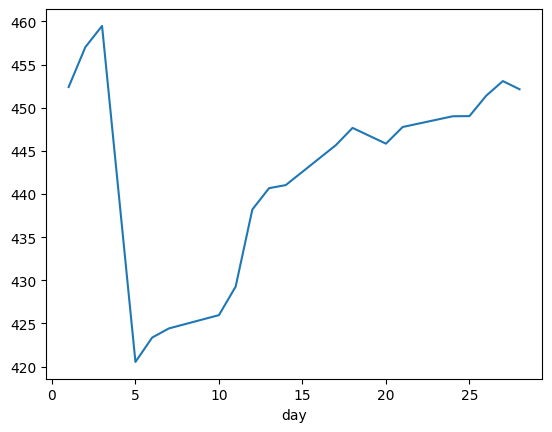

In [48]:
data['day'] = data.index.day
data.groupby('day')['4. close'].mean().plot()

<Axes: xlabel='month'>

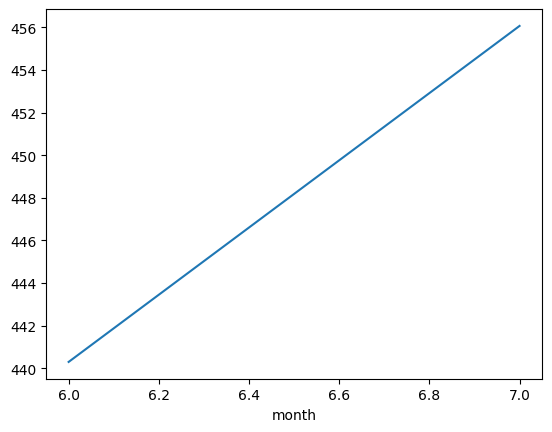

In [49]:
data['month'] = data.index.month
data.groupby('month')['4. close'].mean().plot()

<Axes: xlabel='month'>

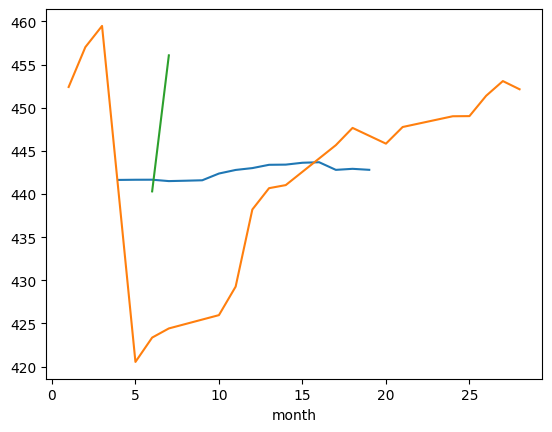

In [46]:
# hiển thị biểu đồ trên từng giờ
data['hour'] = data.index.hour
data.groupby('hour')['4. close'].mean().plot()

# hiển thị biểu đồ trên từng ngày
data['day'] = data.index.day
data.groupby('day')['4. close'].mean().plot()

# hiển thị biểu đồ trên từng tháng
data['month'] = data.index.month
data.groupby('month')['4. close'].mean().plot()

<Axes: xlabel='month'>

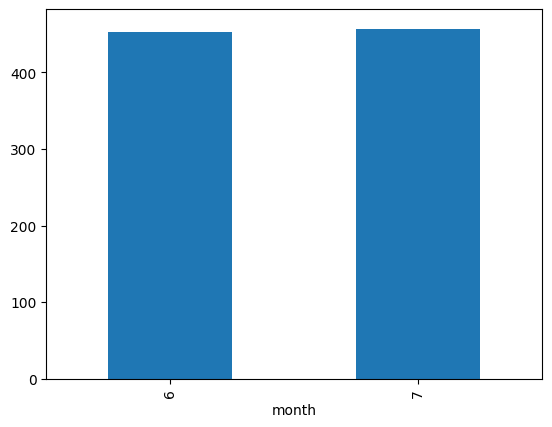

In [45]:
# hiển thị biểu đồ trên từng giờ
data['hour'] = data.index.hour
data.groupby('hour')['4. close'].mean().plot()

# hiển thị biểu đồ trên từng ngày
data['day'] = data.index.day
data.groupby('day')['4. close'].mean().plot()

# hiển thị biểu đồ trên từng tháng
data['month'] = data.index.month
data.groupby('month')['4. close'].mean().plot()

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Tạo mô hình hồi quy đa thức
degree = 3  # Chọn bậc của đa thức
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Huấn luyện mô hình
polyreg_model.fit(X_train, y_train)

# Dự đoán giá cổ phiếu
y_pred_poly = polyreg_model.predict(X_test)

# Đánh giá mô hình
print('Mean Squared Error (Polynomial Regression):', mean_squared_error(y_test, y_pred_poly))

Mean Squared Error (Polynomial Regression): 16.908529197172527
